<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


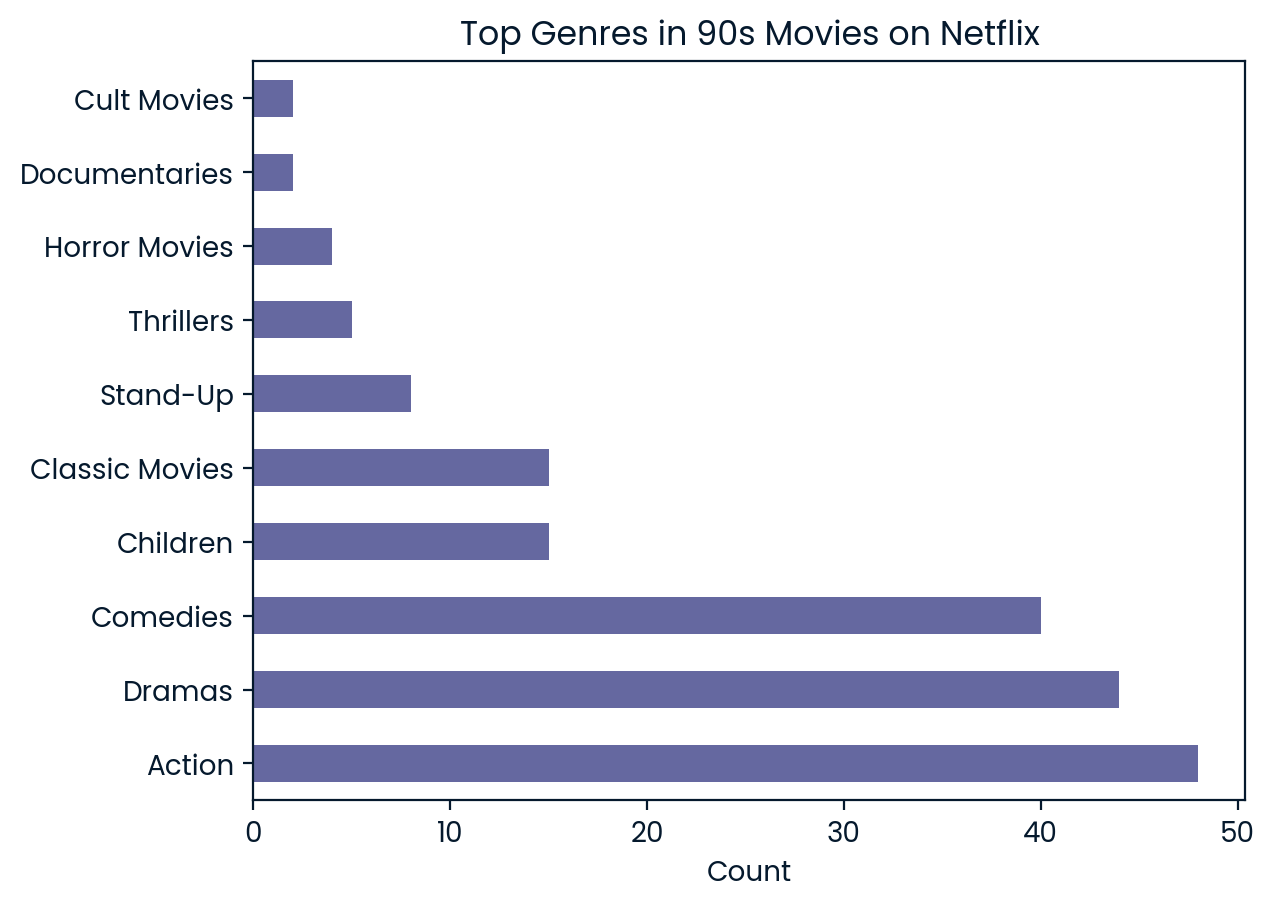

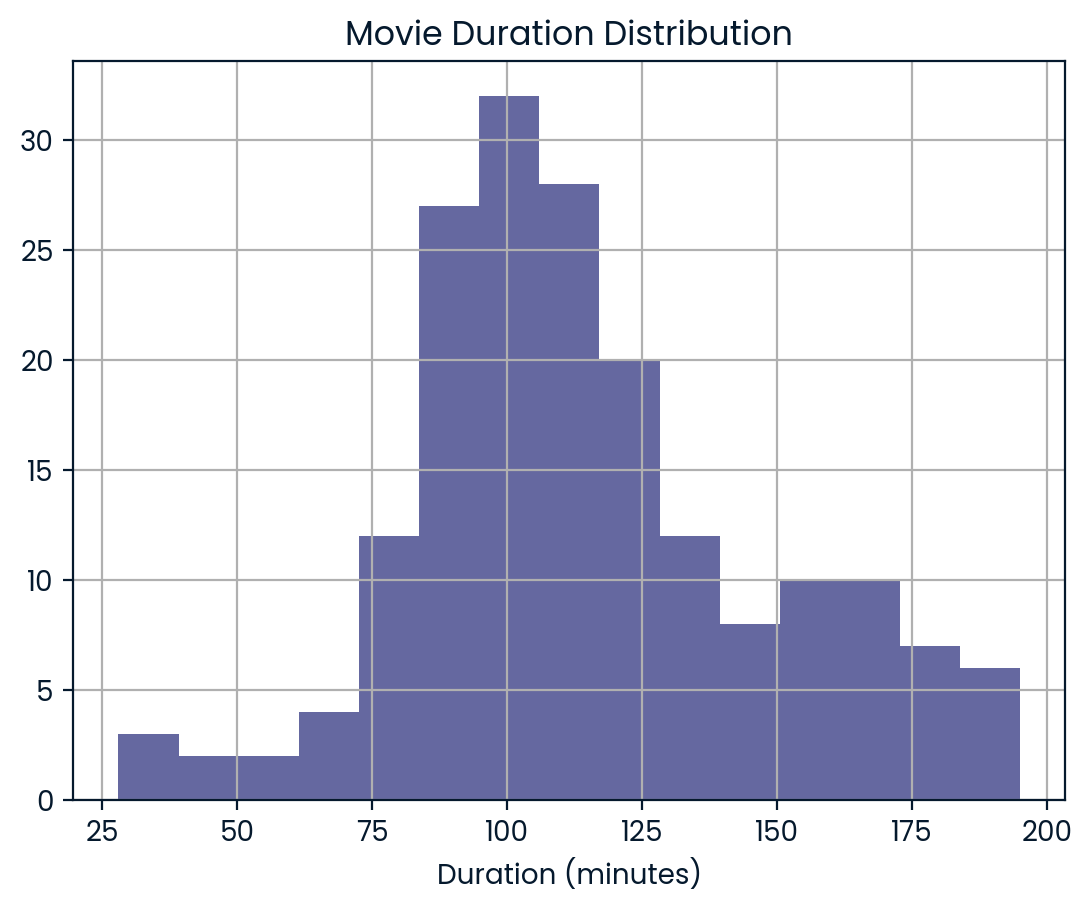

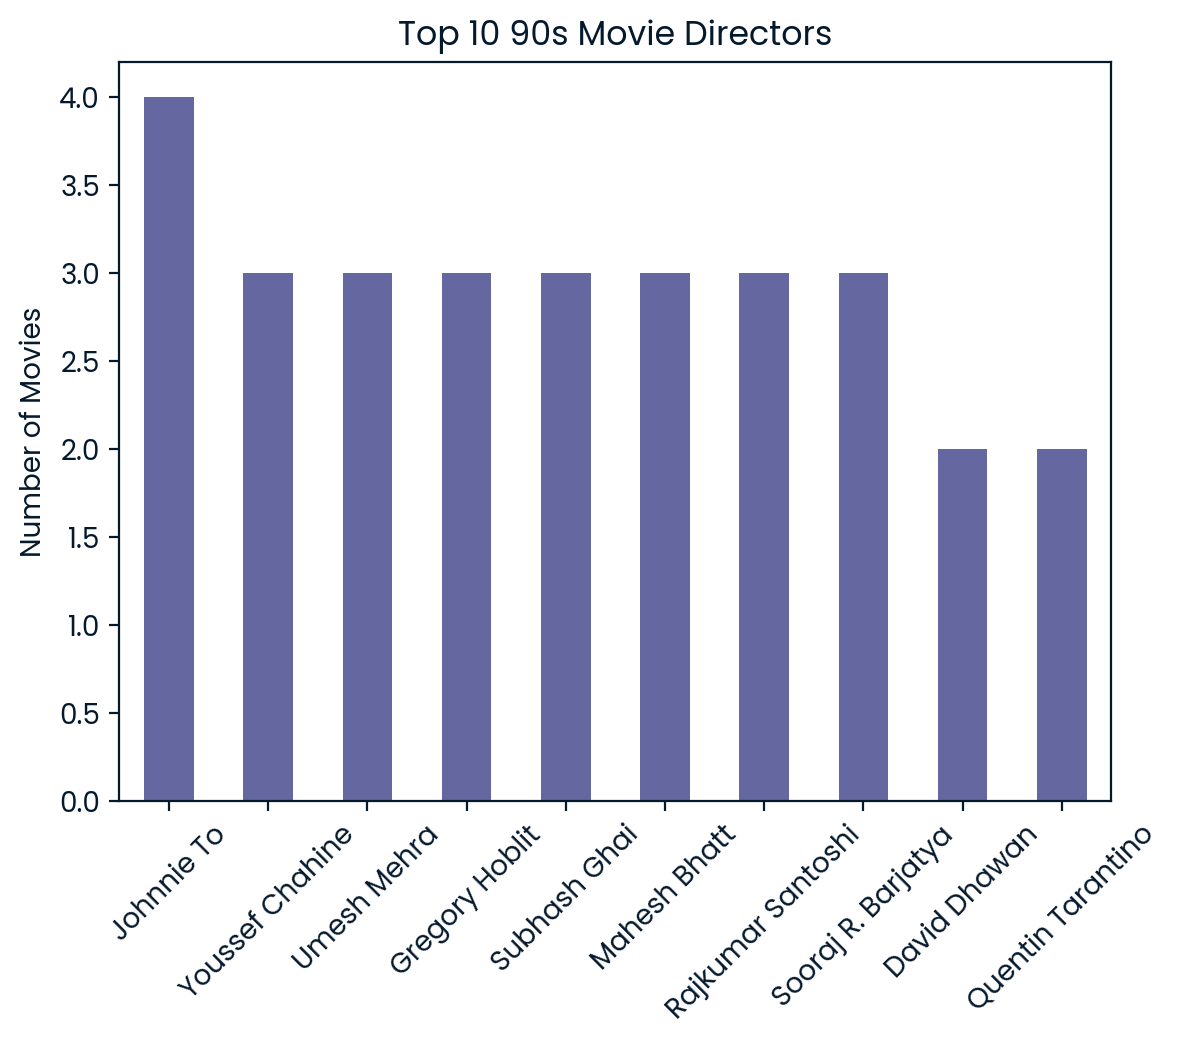

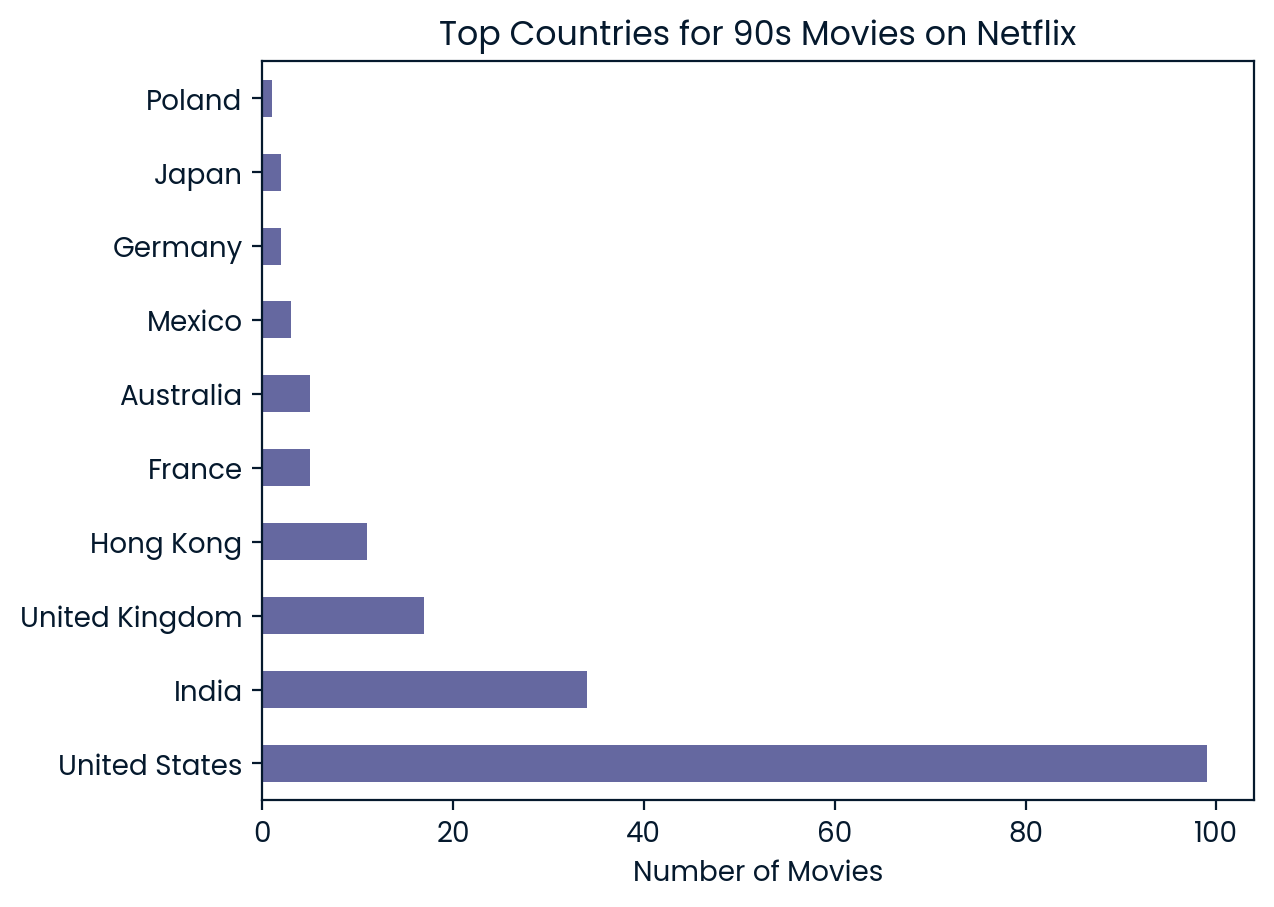

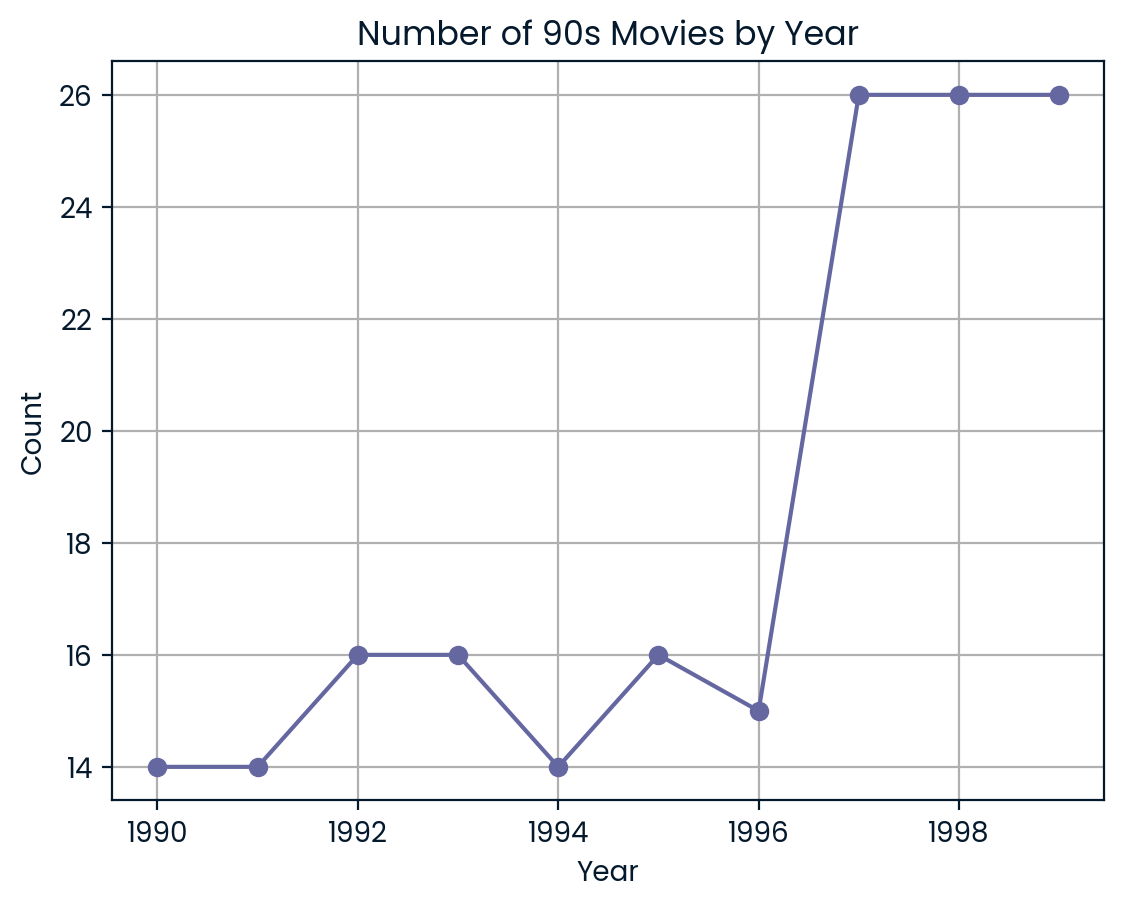

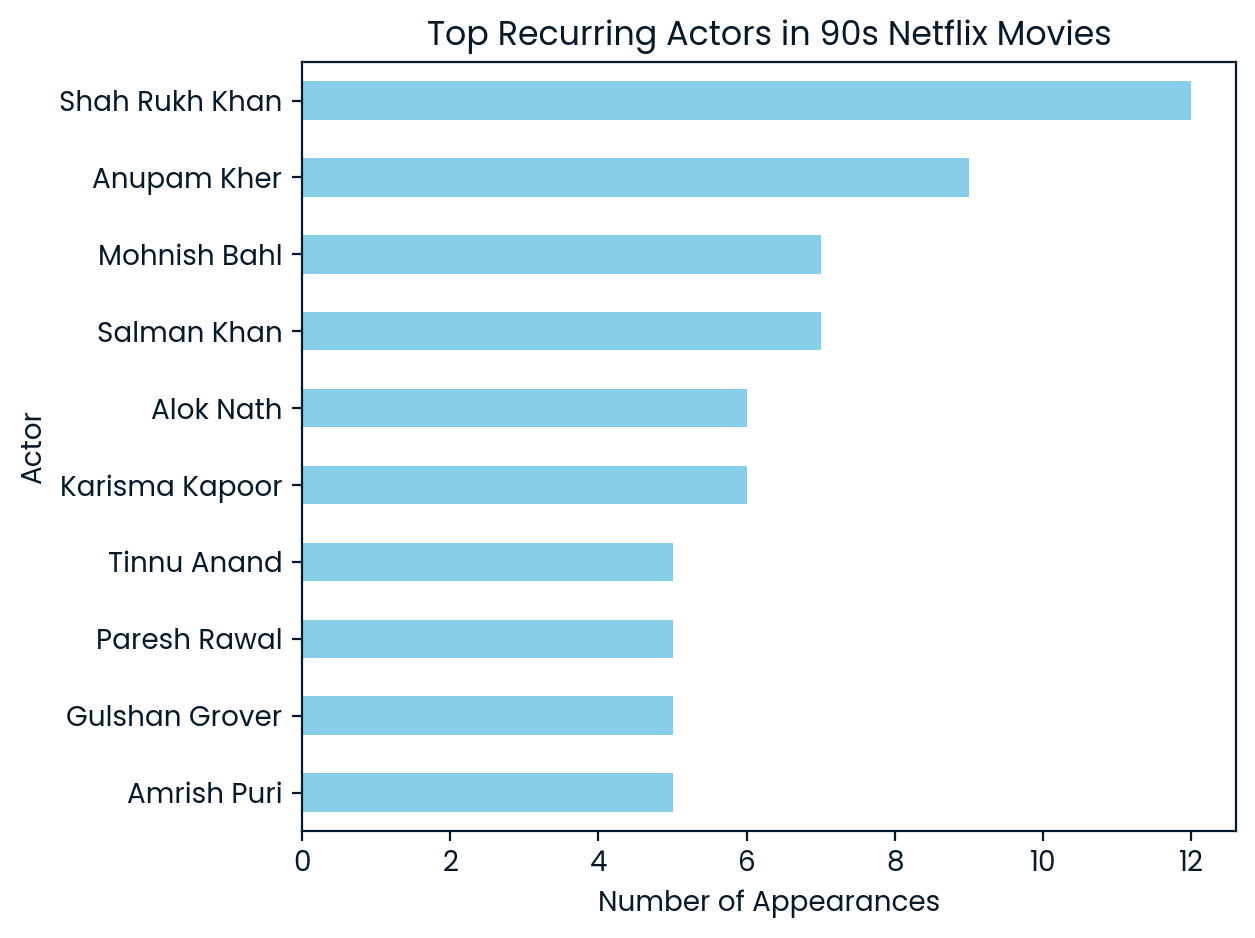

             title  release_year           genre  duration        director
3032  Philadelphia          1993  Classic Movies       126  Jonathan Demme


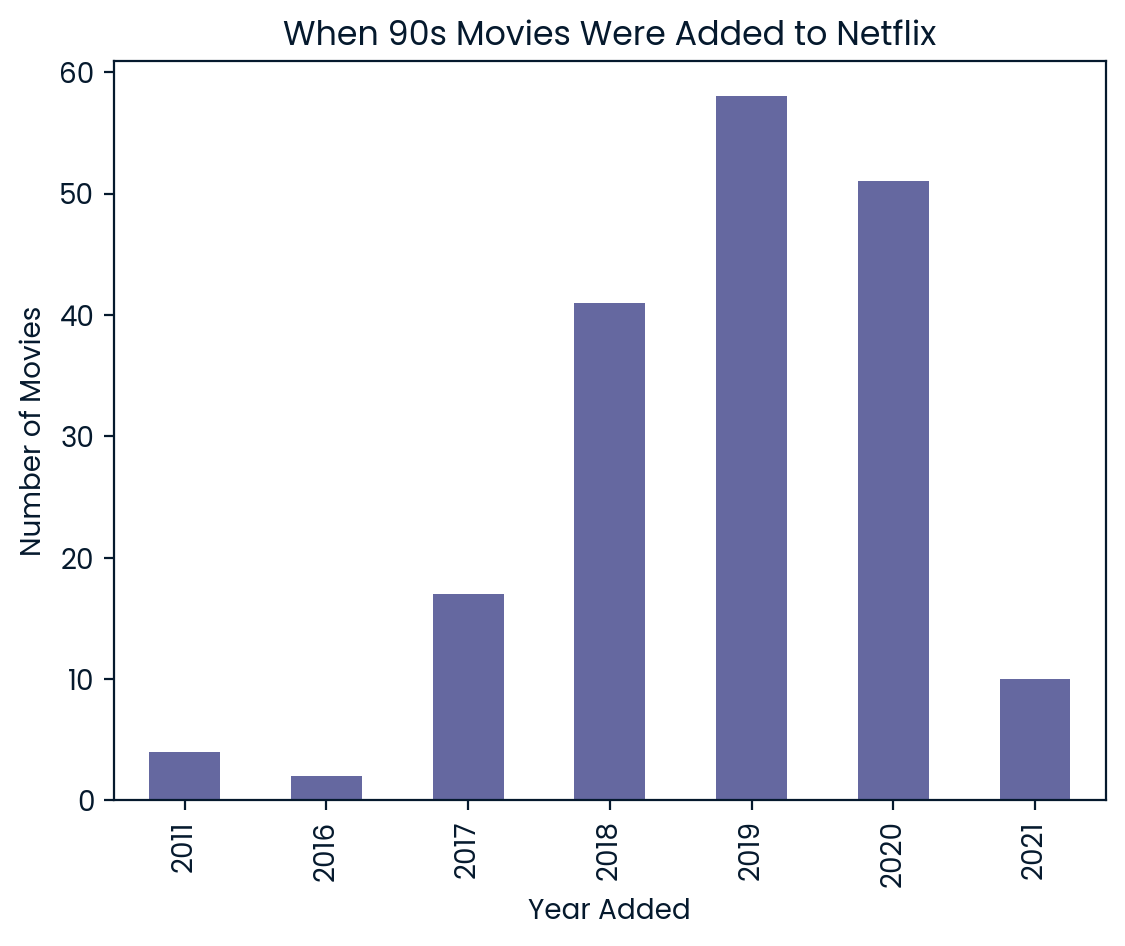

In [14]:
# Start coding here! Use as many cells as you like
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_data.csv")
df.head()
df.info()
df["release_year"].value_counts()
movies_90s = df[(df['type'] == 'Movie') & 
                (df['release_year'] >= 1990) & 
                (df['release_year'] <= 1999)]
# Most common genres
movies_90s['genre'].value_counts().head(10).plot(kind='barh')
plt.title("Top Genres in 90s Movies on Netflix")
plt.xlabel("Count")
plt.show()

# Ensure 'duration' column is of string type before using .str accessor
movies_90s['duration'] = movies_90s['duration'].astype(str)

# Convert 'duration' to numeric (strip 'min' and cast to int)
movies_90s['duration_min'] = movies_90s['duration'].str.extract(r'(\d+)').astype(float)

# Plot histogram
movies_90s['duration_min'].hist(bins=15)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.show()

movies_90s['director'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 90s Movie Directors")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

movies_90s['country'].value_counts().head(10).plot(kind='barh')
plt.title("Top Countries for 90s Movies on Netflix")
plt.xlabel("Number of Movies")
plt.show()

# Count movies per year
movies_90s['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of 90s Movies by Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# Step 1: Make sure you're working with your filtered 90s movie DataFrame
movies_90s = df[(df['type'] == 'Movie') & 
                (df['release_year'] >= 1990) & 
                (df['release_year'] <= 1999)]

# Step 2: Drop rows where 'cast' is missing
movies_90s_cast = movies_90s.dropna(subset=['cast'])

# Step 3: Split the 'cast' strings into lists
actor_lists = movies_90s_cast['cast'].str.split(',')

# Step 4: Flatten all actor names into one list
all_actors = [actor.strip() for sublist in actor_lists for actor in sublist]

# Step 5: Count actors using collections.Counter
from collections import Counter

actor_counts = Counter(all_actors)

# Step 6: Get top 10 actors
top_actors = actor_counts.most_common(10)

# Step 7: Convert to DataFrame and plot
import pandas as pd
import matplotlib.pyplot as plt

top_actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])

# Plot
top_actors_df.plot(kind='barh', x='Actor', y='Count', legend=False, color='skyblue')
plt.title("Top Recurring Actors in 90s Netflix Movies")
plt.xlabel("Number of Appearances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Now filter for rows where 'cast' includes "Tom Hanks"
# Use na=False to ignore NaNs
hanks_movies = movies_90s[movies_90s['cast'].str.contains("Tom Hanks", na=False)]

# View results
print(hanks_movies[['title', 'release_year', 'genre', 'duration', 'director']])

df['cast'].dropna().str.contains("Tom Hanks").sum()
df[df['cast'].str.contains("Tom Hanks", na=False)][['title', 'release_year']]
df[df['cast'].str.contains("tom hanks", case=False, na=False)]
df[df['cast'].str.lower().str.contains("hanks", na=False)]
df[df['cast'].str.contains("Hanks", na=False)][['title', 'cast', 'release_year']]

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Filter for 90s movies
movies_90s = df[(df['type'] == 'Movie') & 
                (df['release_year'] >= 1990) & 
                (df['release_year'] <= 1999)]

# Count by year added
movies_90s['year_added'] = movies_90s['date_added'].dt.year
movies_90s['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("When 90s Movies Were Added to Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Movies")
plt.show()